In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings


In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')

C:\Users\Anda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
df.drop(columns=['country', 'region'], inplace=True)

In [6]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country_txt,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,Dominican Republic,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,Mexico,North America,Federal,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,Philippines,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,Greece,Western Europe,Attica,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,Japan,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,Somalia,Sub-Saharan Africa,Middle Shebelle,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,Syria,Middle East & North Africa,Lattakia,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,Philippines,Southeast Asia,Maguindanao,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,India,South Asia,Manipur,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 
                   'region_txt':'region', 'attacktype1_txt':'attack_type', 'target1':'target', 'nkill':'killed',
                  'nwound':'wounded', 'gname':'group','targtype1_txt':'target_type','weaptype1_txt':'weapon_type',
                  'provstate':'state'}, inplace=True)

#### Not all columns are required - select only important columns.

In [8]:
final_df = df[['year', 'month','day','country','state', 'region','city',
             'latitude','longitude','attack_type','killed','wounded',
            'target','summary','group','target_type','weapon_type','motive']]

In [9]:
final_df.head(5)

,year,month,day,country,state,region,city,latitude,longitude,attack_type,killed,wounded,target,summary,group,target_type,weapon_type,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
final_df.shape

(181691, 18)

#### Check for "nan" and missing values

In [11]:
final_df.isnull().sum()

year                0
month               0
day                 0
country             0
state             421
region              0
city              434
latitude         4556
longitude        4557
attack_type         0
killed          10313
wounded         16311
target            636
summary         66129
group               0
target_type         0
weapon_type         0
motive         131130
dtype: int64

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   attack_type  181691 non-null  object 
 10  killed       171378 non-null  float64
 11  wounded      165380 non-null  float64
 12  target       181055 non-null  object 
 13  summary      115562 non-null  object 
 14  group        181691 non-null  object 
 15  target_type  181691 non-null  object 
 16  weapon_type  181691 non-null  object 
 17  motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [13]:
final_df.describe(include='all')

,year,month,day,country,state,region,city,latitude,longitude,attack_type,killed,wounded,target,summary,group,target_type,weapon_type,motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2854,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory data analysis

In [14]:
print('Country with most attacks: ', final_df['country'].value_counts().idxmax())
print('City with most attacks: ', final_df['city'].value_counts().index[1])
print('Region with most attacks: ', final_df['region'].value_counts().idxmax())
print('Year with the highest attack occurence: ', final_df['year'].value_counts().idxmax())
print('Month with the highest attack occurence: ', final_df['month'].value_counts().idxmax())
print('Group with the most attacks: ', final_df['group'].value_counts().index[1])
print('Most Attack types: ', final_df['attack_type'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with the highest attack occurence:  2014
Month with the highest attack occurence:  5
Group with the most attacks:  Taliban
Most Attack types:  Bombing/Explosion


In [15]:
final_df['year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

#### Data visualization

In [16]:
import seaborn as sns

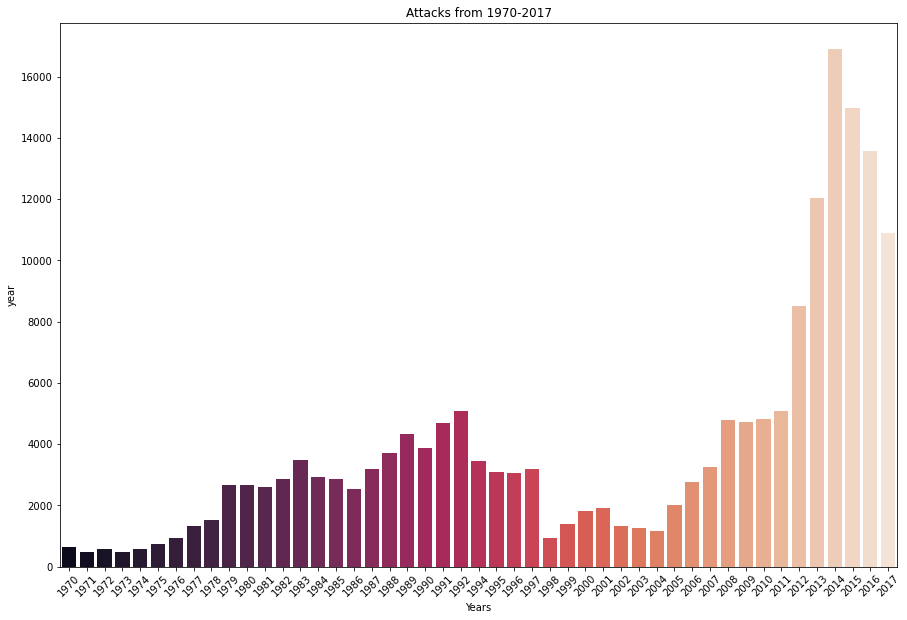

In [17]:
x_axis = final_df['year'].unique()
y_axis = final_df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15, 10))
plt.title('Attacks from 1970-2017')
plt.xlabel('Years')
plt.ylabel('Number of attacks each year')
plt.xticks(rotation=45)
sns.barplot(x=x_axis, y=y_axis, palette='rocket')
plt.show()


####  Area plot

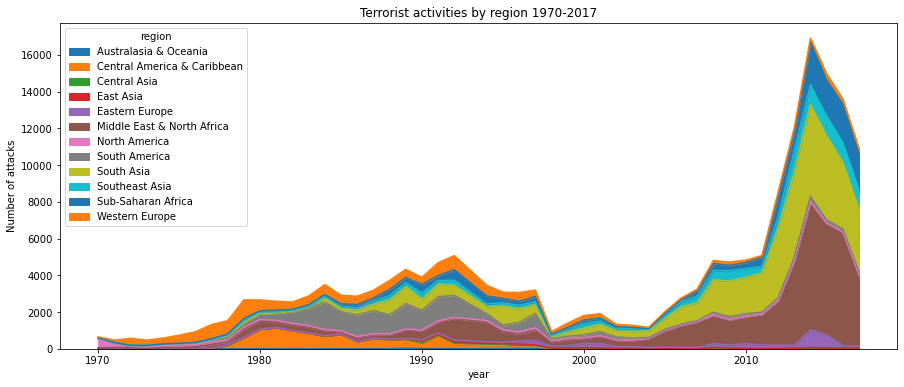

In [18]:
pd.crosstab(final_df.year, final_df.region).plot(kind='area', figsize=(15,6))
plt.title('Terrorist activities by region 1970-2017')
plt.ylabel('Number of attacks')
plt.show()

#### Correlation

In [19]:
final_df['wounded'] = final_df['wounded'].fillna(0).astype(int)
final_df['killed'] = final_df['killed'].fillna(0).astype(int)
final_df['casualties'] = final_df['wounded'] + final_df['killed']

<ipython-input-19-a4d2fa4c59bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['wounded'] = final_df['wounded'].fillna(0).astype(int)
<ipython-input-19-a4d2fa4c59bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['killed'] = final_df['killed'].fillna(0).astype(int)
<ipython-input-19-a4d2fa4c59bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [20]:
copy = final_df.sort_values(by='casualties', ascending = False)[:30]

In [21]:
copy.corr()

,year,month,day,latitude,longitude,killed,wounded,casualties
year,1.000000,-0.032080,-0.169634,0.003728,0.150097,0.132656,-0.249850,-0.203149
month,-0.032080,1.000000,-0.270759,0.314738,-0.398737,0.105265,0.101020,0.112755
day,-0.169634,-0.270759,1.000000,-0.057494,0.198550,-0.171906,-0.032207,-0.062604
latitude,0.003728,0.314738,-0.057494,1.000000,-0.223085,-0.017608,0.131062,0.116579
longitude,0.150097,-0.398737,0.198550,-0.223085,1.000000,-0.196272,-0.258780,-0.274700
killed,0.132656,0.105265,-0.171906,-0.017608,-0.196272,1.000000,0.354211,0.516918
wounded,-0.249850,0.101020,-0.032207,0.131062,-0.258780,0.354211,1.000000,0.983632
casualties,-0.203149,0.112755,-0.062604,0.116579,-0.274700,0.516918,0.983632,1.000000


#### Heatmap - Using only 30 countries to be able to display a clear map

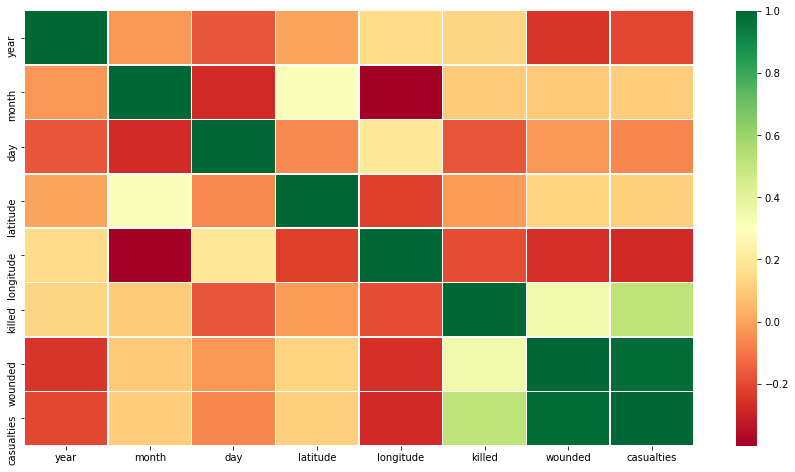

In [22]:
plt.figure(figsize=[15, 8])
sns.heatmap(copy.corr(), cmap='RdYlGn', linewidths=0.4)
plt.show()

In [23]:
attack_country = final_df.country.value_counts()[:20]

#### Top 20 countries affected by terrorism

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


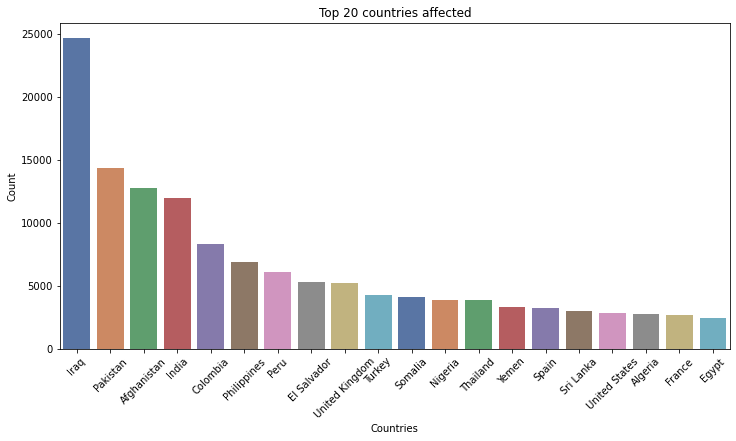

In [24]:
plt.subplots(figsize=(12, 6))
sns.barplot(attack_country.index, attack_country.values, palette = 'deep')
plt.title('Top 20 countries affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
attack_groups = final_df.group.value_counts()[1:15]
attack_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: group, dtype: int64

#### Top 15 groups involved in terrorist attacks

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


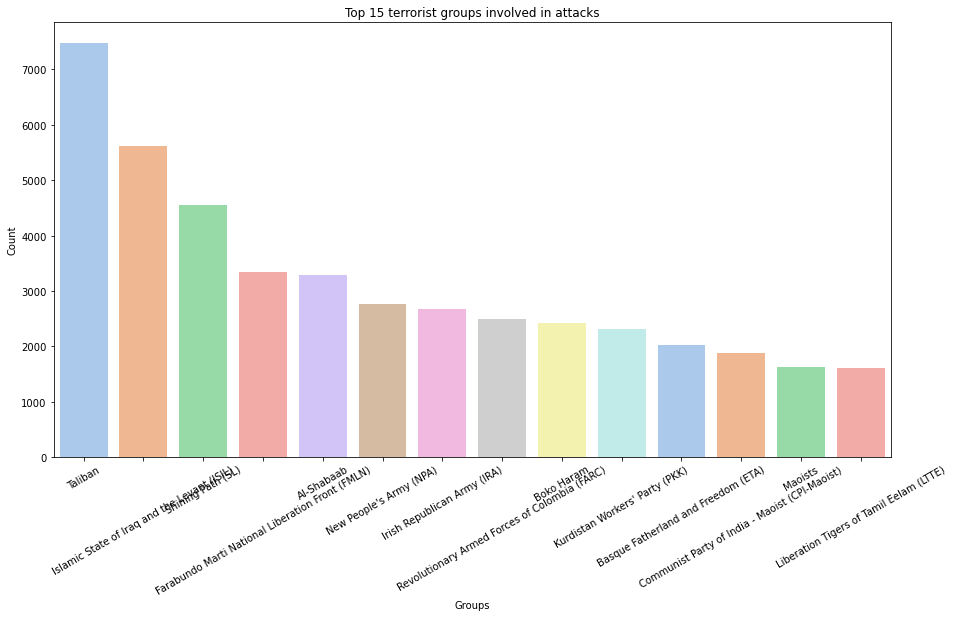

In [26]:
plt.subplots(figsize=(15, 8))
sns.barplot(attack_groups.index, attack_groups.values, palette = 'pastel')
plt.title('Top 15 terrorist groups involved in attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

#### Number of people killed by each group - first 15

In [27]:
group_killed = final_df[['group', 'killed']].groupby(['group'], axis=0).sum().sort_values('killed', ascending=False).head(15)

In [28]:
group_killed

,killed
group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


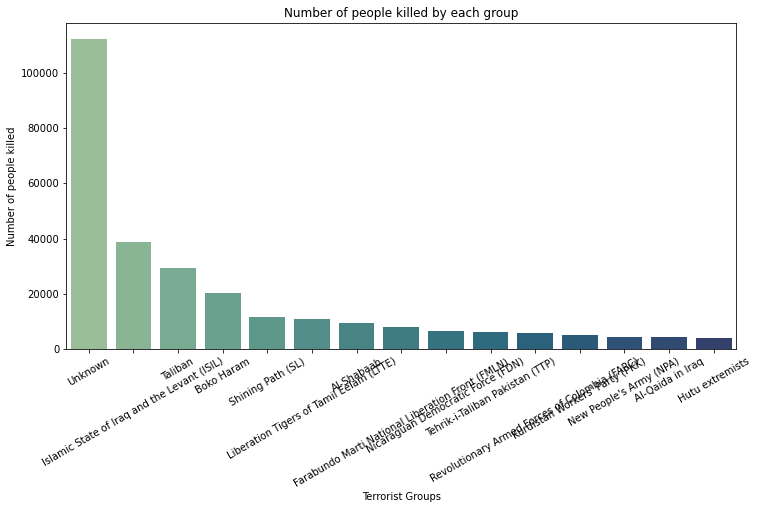

In [29]:
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.killed.values, palette="crest")
plt.title('Number of people killed by each group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation=30)
plt.show()

#### Number of killed people due to terrorism attacks 1970-2017

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


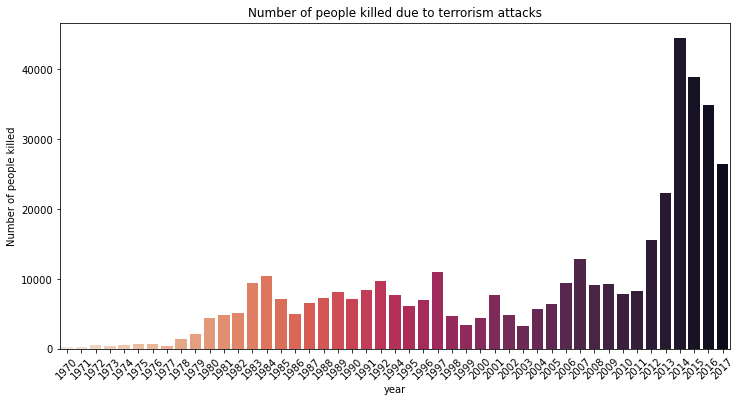

In [30]:
killed_people = final_df[['year', 'killed']].groupby(['year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(killed_people.index, killed_people.killed.values, palette = "rocket_r")
plt.title('Number of people killed due to terrorism attacks')
plt.xlabel('year')
plt.ylabel('Number of people killed')
plt.xticks(rotation=45)
plt.show()

In [31]:
cities_attacked = final_df.city.value_counts()[:15]

In [32]:
cities_attacked

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

#### Top countries affected

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


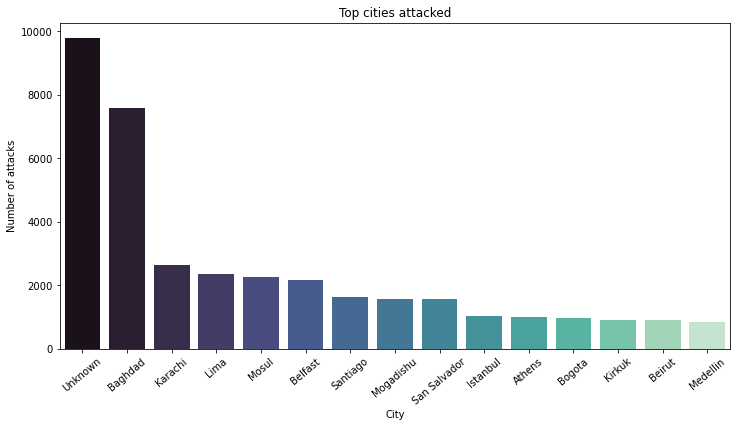

In [33]:
plt.subplots(figsize=(12,6))
sns.barplot(cities_attacked.index, cities_attacked.values, palette='mako')
plt.title('Top cities attacked')
plt.xlabel('City')
plt.ylabel('Number of attacks')
plt.xticks(rotation=40)
plt.show()

In [34]:
attack_type = final_df.attack_type.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


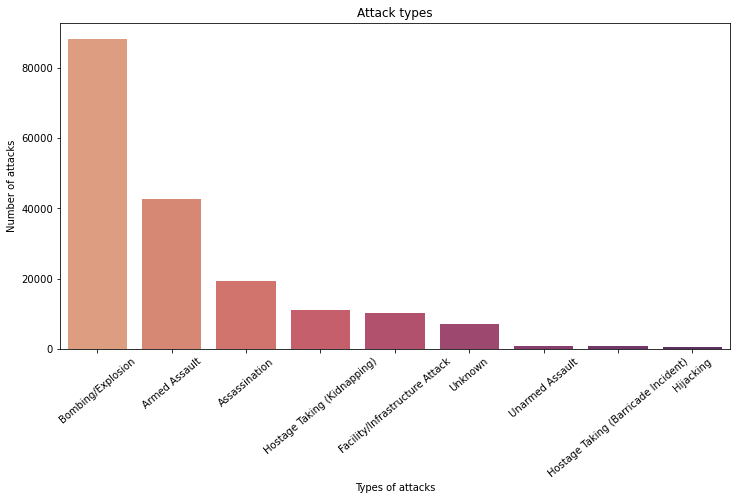

In [35]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index, attack_type.values, palette='flare')
plt.title('Attack types')
plt.xlabel('Types of attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation=40)
plt.show()

In [36]:
attack_murders = final_df[['attack_type', 'killed']].groupby(['attack_type'], axis=0).sum()

In [37]:
attack_murders

,killed
attack_type,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


#### Number of victims due to each type of attack

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


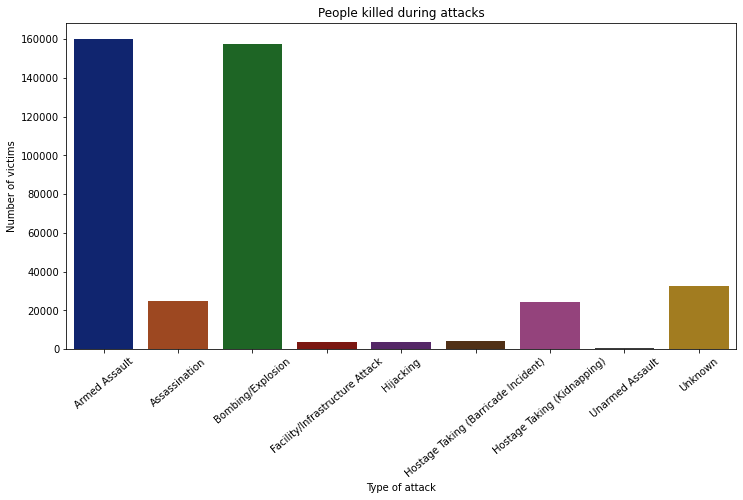

In [38]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_murders.index, attack_murders.killed.values, palette='dark')
plt.title('People killed during attacks')
plt.xlabel('Type of attack')
plt.ylabel('Number of victims')
plt.xticks(rotation=40)
plt.show()

In [44]:
wounded_people = final_df[['attack_type', 'wounded']].groupby(['attack_type'], axis=0).sum()
wounded_people

,wounded
attack_type,
Armed Assault,77365
Assassination,13887
Bombing/Explosion,372686
Facility/Infrastructure Attack,3765
Hijacking,17001
Hostage Taking (Barricade Incident),3966
Hostage Taking (Kidnapping),6446
Unarmed Assault,14027
Unknown,14725


#### Number of people wounded

C:\Users\Anda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


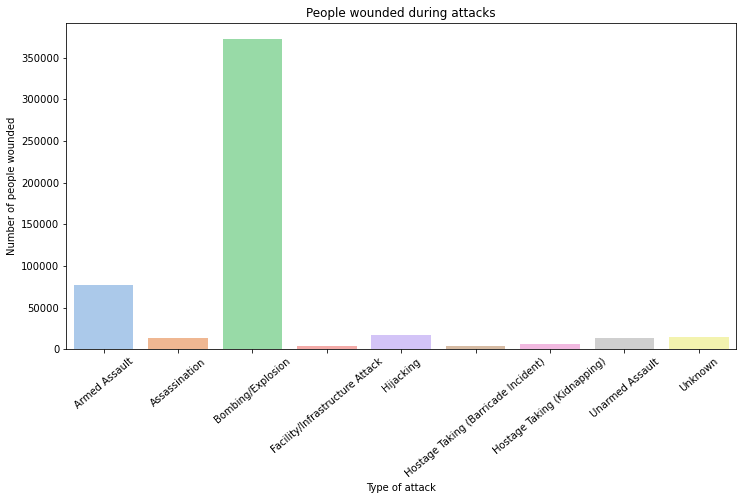

In [47]:
plt.subplots(figsize=(12,6))
sns.barplot(wounded_people.index, wounded_people.wounded.values, palette='pastel')
plt.title('People wounded during attacks')
plt.xlabel('Type of attack')
plt.ylabel('Number of people wounded')
plt.xticks(rotation=40)
plt.show()